# 1.Importing libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def detect_circles(image):
    '''
    Returns the image with detected circles highlighted.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        out_img (numpy.ndarray): The result image with circles highlighted.
    '''
    out_img = image.copy()

    # Convert to grayscale for circle detection
    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 1)
    
    # Detect circles using HoughCircles
    detected_circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=30,
        minRadius=1,
        maxRadius=100
    )
    
    # Draw detected circles on the output image
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        for x, y, r in detected_circles[0, :]:
            # Draw the outer circle in white
            cv2.circle(out_img, (x, y), r, (255, 255, 255), 2)
            # Draw the center of the circle in red
            cv2.circle(out_img, (x, y), 2, (0, 0, 255), 3)
    
    return out_img

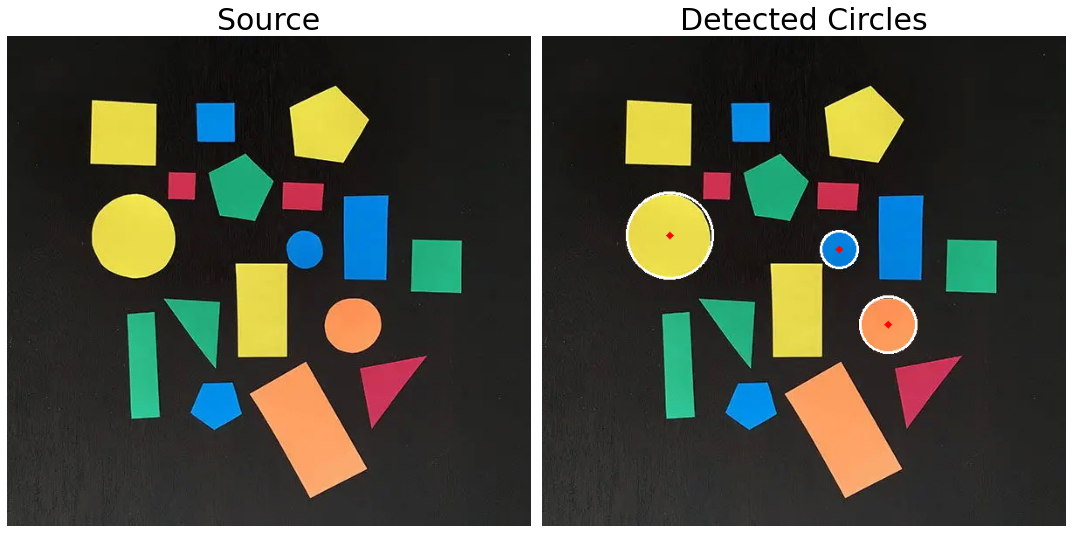

In [12]:
# Load the image in RGB
image = cv2.imread('image 3.jpg')

# Apply the detect_circles function
detected_image = detect_circles(image)

# Display images side-by-side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Source', fontsize=30)
plt.axis('off')

# Image with detected circles
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles', fontsize=30)
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()